# Monte Carlo

In [1]:
using PyPlot
using Random

## Monte Carlo simulations

A common technique to estimate probabilities and statistical quantities is *Monte Carlo simulation*. The computer runs many simulations that depend on random numbers and records the outcomes. The desired quantity can then be estimated by simple fractions.

As an example, the code below simulates rolling a die repeatedly until it rolls a 6, and recording the number of rolls that it took. The average number of rolls required can then be estimated.

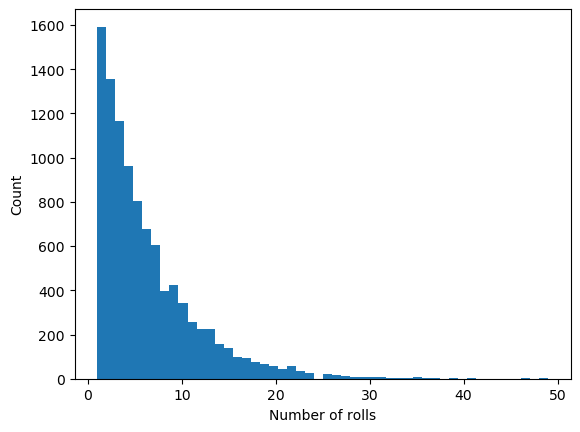

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/mfranco/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


6.1382

In [2]:
ntrials = 10000            # Number of experiments
x = Int64[]                # Array of outcomes
sumx = 0
for i = 1:ntrials
    nrolls = 0
    found_a_six = false
    while !found_a_six
        nrolls += 1
        roll = rand(1:6)
        if roll == 6
            found_a_six = true
        end
    end
    push!(x, nrolls)
    sumx += nrolls
end

plt.hist(x, 50);
xlabel("Number of rolls")
ylabel("Count")
average = sumx / ntrials

### Card games, permutations

To simulate card games, we need a way to represent the cards. There are 13 *ranks* and 4 *suits*, so we could simply use an integer between 1 and 52 and let 1 to 13 represent Ace, 2, 3, ..., King of clubs, 14 to 26 all the diamonds, etc. We can use integer division and remainder to find the rank and suit:

In [3]:
function card_rank(card)
    (card - 1) % 13 + 1
end

function card_suit(card)
    (card - 1) ÷ 13 + 1
end

cards = 1:52      # All cards
[card_rank.(cards) card_suit.(cards)]

52×2 Matrix{Int64}:
  1  1
  2  1
  3  1
  4  1
  5  1
  6  1
  7  1
  8  1
  9  1
 10  1
 11  1
 12  1
 13  1
  ⋮  
  2  4
  3  4
  4  4
  5  4
  6  4
  7  4
  8  4
  9  4
 10  4
 11  4
 12  4
 13  4

We can now draw a random card by generating a random integer between 1 and 52. However, to deal e.g. a poker hand of 5 cards, we need to make sure we do not draw the same card twice. One way to do this is with Julia's `randperm(n)` function, which generates a random permutation of the integers 1 up to `n`. We can use this to represent a shuffled deck of cards, and use the first 5 cards to deal a poker hand:

In [4]:
cards = randperm(52)
hand = cards[1:5]
[card_rank.(hand) card_suit.(hand)]

5×2 Matrix{Int64}:
 12  4
  4  3
  2  1
  5  3
  2  4

### Example: Probability of flush

A *flush* means that all cards have the same suit. To estimate the probabilty that a random poker hand is a flush, we run Monte Carlo simulation:

In [5]:
ntrials = 100000
nflush = 0
for itrial = 1:ntrials
    cards = randperm(52)
    hand = cards[1:5]

    suits = card_suit.(hand)
    same_suit = true
    for i = 2:5
        if suits[i] ≠ suits[1]
            same_suit = false
            break
        end
    end
    if same_suit
        nflush += 1
    end
end

approx_probability = nflush / ntrials

0.00208

This problem can also be solved using combinatorial techniques, which we can use to check the approximation:

In [6]:
exact_probability = 4 * binomial(13,5) / binomial(52,5)

0.0019807923169267707

## Estimate $\pi$ by throwing darts

Random number can be used to approximate areas, or more generally, to estimate integrals. To illustrate this, consider a 2-by-2 square with a unit disk inside. Imagine throwing $n$ darts on the square with equal probability everywhere. Then the fraction of darts that hit inside the circle should approximate the ratio between the areas, that is:

$$
\frac{\mathrm{hits}}{n} \approx \frac{\pi r^2}{(2r)^2}
$$

where the radius $r=1$. This means we can estimate $\pi$ as

$$
\pi \approx 4 \frac{\mathrm{hits}}{n}
$$

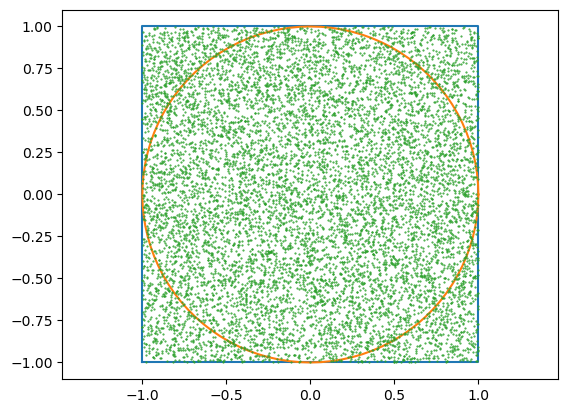

3.1616

In [7]:
n = 10000               # Number of darts
x = 2rand(n) .- 1       # Coordinates
y = 2rand(n) .- 1

plot([-1,1,1,-1,-1], [-1,-1,1,1,-1])  # Draw square
theta = 2π*(0:100)./100               # Draw circle
plot(cos.(theta), sin.(theta))   
plot(x, y, linestyle="None", marker=".", markersize=1)   # Plot dart points
axis("equal")

# Determine if points are inside the circle (a "hit")
hits = 0
for i = 1:n
    if x[i]^2 + y[i]^2 ≤ 1
        hits += 1
    end
end

approx_pi = 4hits / n

## Example: Random walk

A *random walk* can be described by the following algorithm:

- Consider a 2-d array of square cells
- Start at the center cell
- At each turn, randomly choose a direction (up/down/left/right) and move to that neighboring cell
- Continue until reaching an edge

In [8]:
function random_walk(n)
    x = [0]
    y = [0]
    while abs(x[end]) < n && abs(y[end]) < n
        if rand() < 0.5
            if rand() < 0.5  # Up
                push!(x, x[end])
                push!(y, y[end] + 1)
            else             # Down
                push!(x, x[end])
                push!(y, y[end] - 1)
            end
        else
            if rand() < 0.5  # Right
                push!(x, x[end] + 1)
                push!(y, y[end])
            else             # Left    
                push!(x, x[end] - 1)
                push!(y, y[end])
            end
        end
    end
    x,y
end    

random_walk (generic function with 1 method)

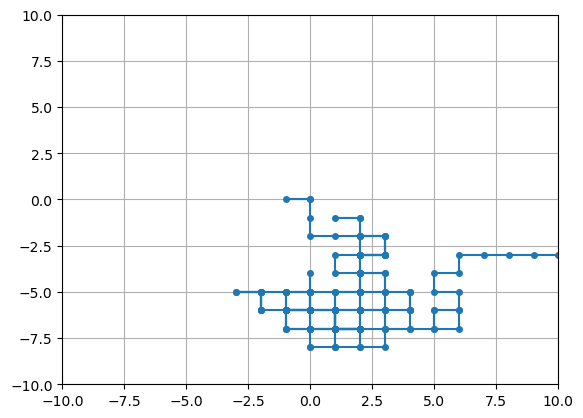

In [9]:
n = 10
x,y = random_walk(n)

plot(x, y, marker=".", markersize=8)     # Draw dots at each point in x,y
grid(true)
axis([-n,n,-n,n]);